## Lesson-01

In [313]:
import random
two_number = """
num* => num num* | num
num => 0 | 1 | 2 | 3 | 4 
"""

def two_num(): return num() + num()

def num():
    return random.choice('0 | 1 | 2 | 3 | 4 '.split("|"))

def numbers():
    if random.random() < 0.5:
        return num()
    else:
        return num() + numbers()

#num()
#two_num()

for i in range(10):
    print(numbers())
#语法可以通过函数实现
#使用递归

0 
 2  1 
 3  3 
 1  3 
 2  4  3  1 0 0 
 2  1 
 2 
 3 
 1 
0 


In [78]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [315]:
another_grammar = """
# 
"""

import random

In [316]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0] #去空格
def adj1():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|'))

In [317]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()
def adj_star1():
    return random.choice([lambda : '', lambda : adj1() + adj_star1()])()

In [318]:
#print(random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0])
#print(adj())
#adj_star()
adj() + adj_star()

'好看的好看的'

## But the question is ? 

In [319]:
two_number = """
two => num op num
op => + | - | * | /
num => 0 | 1 | 2 | 3 | 4
"""

def generate_gramar(grammar_str : str, target , split = "=>"):
    grammar = {}
    for line in grammar_str.split("\n"):
        if not line : continue
        expression , formula  = line.split(split)
        formulas = formula.split("|")
        formulas= [f.split() for f in formulas]
        print (expression,":", formulas)
        grammar[expression.strip()] = formulas
    return grammar

choice_exper = random.choice

def generate_by_grammar(grammar : dict ,target :str):
    print("target:" + target)
    if target not in grammar: 
        return target
    exper = choice_exper(grammar[target])
    print(exper)
    return " ".join(generate_by_grammar(grammar,t) for t in exper)

#generate_gramar(two_number,target="two")

In [320]:
generated_grammar = generate_gramar(two_number,"two")

two  : [['num', 'op', 'num']]
op  : [['+'], ['-'], ['*'], ['/']]
num  : [['0'], ['1'], ['2'], ['3'], ['4']]


In [321]:
generate_by_grammar(generated_grammar,"two")


target:two
['num', 'op', 'num']
target:num
['3']
target:3
target:op
['+']
target:+
target:num
['2']
target:2


'3 + 2'

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [322]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [75]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [324]:
grammar = create_grammar(adj_grammar)

In [325]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [326]:
choice_exper = random.choice

def generate_by_grammar(grammar : dict ,target :str):
    print("target:" + target)
    if target not in grammar: 
        return target
    exper = choice_exper(grammar[target])
    print(exper)
    return " ".join(generate_by_grammar(grammar,t) for t in exper)

In [71]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [328]:
''.join([e if e != '/n' else '\n' for e in "您\n好\n" if e != 'null'])
#print(''.join([e+'e' for e in "您好" if e != 'null']))

#print([e if e != '/n' else '\n' for e in "您\n好\n" if e != 'null'])

'您\n好\n'

In [84]:
example_grammar = create_grammar(simple_grammar)

In [330]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [76]:
generate(gram=example_grammar, target='sentence')

NameError: name 'example_grammar' is not defined

In [79]:
generate(gram=create_grammar(simple_grammar), target='sentence')

'一个女人看见一个小猫'

In [332]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [333]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

你好我是8号,请问你要打牌吗？
你好我是6号,您需要赌博吗？
女士,你好我是99号,请问你要赌博吗？
你好我是8号,您需要赌博吗？
你好我是51784951941号,您需要喝酒吗？
小朋友,您好我是6号,您需要赌博吗？
小朋友,你好我是9号,请问你要打牌吗？
您好我是3号,您需要打猎吗？
你好我是7号,您需要打猎吗？
先生,您好我是44号,请问你要赌博吗？
女士,你好我是8号,请问你要打猎吗？
你好我是954号,您需要赌博吗？
您好我是8号,您需要打牌吗？
你好我是1号,您需要喝酒吗？
小朋友,您好我是1号,请问你要喝酒吗？
女士,你好我是57号,您需要打牌吗？
您好我是6号,请问你要喝酒吗？
先生,您好我是4号,请问你要打牌吗？
小朋友,你好我是4号,您需要打猎吗？
你好我是6号,您需要打猎吗？


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [334]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [335]:
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

while(student_name>=lib_3){/Nif(info_database_database_info_info<lib_0_4_3_6){/Nif(database_databasestudent_8){/Nif(name_infolib_lib_name_1){/Ndatabase=student_student/N}else{/Nif(student_lib_name<=student_4){/Nif(info==lib){/Ndatabase_5_0_0=info_5/N}/N}else{/Ninfo_8_4_1_3_1_3=database_student_student_database_database_lib_9_9/N}/N}/N}/N}else{/Nif(database_lib_lib_name_9<=database_0_2){/Nif(info_6<info_database_0_8_9){/Nif(info_info<lib_student_name_lib_student){/Nif(info_name_database_name_lib_7student_3_9_4){/Nif(info_name_info<=info){/Nif(database_8info_1_2_1){/Nif(name_5_3_5==name_student_database_name_name_info_lib_database){/Nname_database=name/N}else{/Nif(student<database_name_9_7_4_4_4){/Nif(student<=name_info_name_student){/Nif(database_database<name_database_0_5){/Nif(student==name_lib_lib_lib_4_7_7){/Nstudent_database_student=student/N}/N}/N}/N}/N}/N}else{/Nif(lib_database_name_0_9_7<student_0){/Ninfo=lib_student_5/N}else{/Nstudent_student_student_lib=database/N}/N}/N}else{/

In [336]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [337]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [338]:
for line in generated_programming:
    print(line)

while(database_4>=lib_0_4_8){
  if(database_student_student_database_8_8_9_8_0_7_7_3database_2){
    if(name<=database_lib_5){
      database=database_5_4
        }else{
          if(student_name_3_1_0_3_6==name_name_info){
            name=name_6
              }else{
                database_database_5=database
        }
       }
      }else{
     if(name<lib){
    lib_6=lib_info_name_database_database
   }
  }
 }
while(lib_info_5<info_database_name_name_4_6_7_6_6){
  if(lib_lib>=student_7){
    student_9_2_6_2_1=info_lib_3_8
      }else{
        if(name_info_8database){
          if(info_7<database_student_8){
            if(database<name_info_student_2_3){
              database_lib_8_1=lib_info_2_7_6
                }else{
                  info_9=lib_database_name_lib_lib_1
                    }
                      }else{
                        if(studentstudent_4){
            if(info_7_6_1database_student_name){
           name_name_student=student_student_lib_database_studen

# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [1]:
import random

In [340]:
random.choice(range(100))

14

In [2]:
filename = 'D:/Repos/MyPython/Nlp/sqlResult_1558435.csv'

In [3]:
import pandas as pd

In [4]:
content = pd.read_csv(filename, encoding='gb18030')

In [7]:
type(content)

pandas.core.frame.DataFrame

In [8]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
articles = content['content'].tolist()

In [6]:
len(articles)

89611

In [11]:
articles[0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [49]:
import re #正则表达式

In [9]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [10]:
token(articles[0])

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [11]:
from collections import Counter

In [12]:
import jieba
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\jeffb\AppData\Local\Temp\jieba.cache
Loading model cost 1.325 seconds.
Prefix dict has been built successfully.


In [13]:
list(jieba.cut("汉语分词测试！"))

['汉语', '分词', '测试', '！']

In [17]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [24]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [15]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [16]:
len(articles_clean)

89611

In [22]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [23]:
def cut(string): return list(jieba.cut(string))

In [24]:
import jieba

In [23]:
def cut(string): return list(jieba.cut(string))

In [387]:
def cut1(string): return jieba.cut(string)

In [21]:
TOKEN = []

In [25]:
for i, line in enumerate((open('article_9k.txt'))):
    if i % 10000 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    #if i > 10000: break    
    TOKEN += cut(line)

0
10000
20000
30000
40000
50000
60000
70000
80000


In [386]:
all_token = cut(open('article_9k.txt').read())


In [ ]:
all_token1 = cut1(open('article_9k.txt').read())

In [34]:
with open("article_9k_cut.txt",'w') as f:
    for a in TOKEN:
        f.write(a + '\n')

In [397]:
for i,t in enumerate(all_token):
    #if i > 50000: break
    if i % 1000 == 0: print(i)
    TOKEN.append(t)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [33]:
len(TOKEN)

17618254

In [27]:
TOKEN[0:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [35]:
from functools import reduce

In [36]:
from operator import add, mul

In [37]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [38]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [39]:
from collections import Counter

In [96]:
words_count = Counter(TOKEN)

In [41]:
words_count.most_common(100)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [42]:
frequiences = [f for w, f in words_count.most_common(100)]

In [43]:
frequiences[0:10]

[703716,
 382020,
 263597,
 189330,
 166300,
 142462,
 134061,
 123106,
 121938,
 100909]

In [47]:
x = [i for i in range(100)]

In [48]:
%matplotlib inline

In [49]:
import matplotlib.pyplot as plt

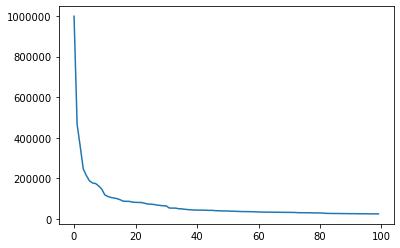

In [50]:
plt.plot(x, frequiences)

In [51]:
import numpy as np

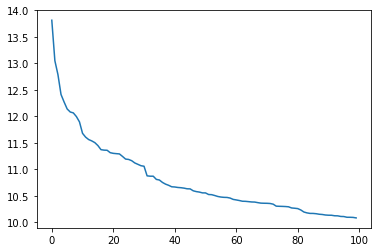

In [54]:
plt.plot(x, np.log(frequiences))

In [55]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [56]:
prob_1('我们')

0.0011840446265800656

In [ ]:
#从cut中读取分词数据
for i, line in enumerate((open('article_9k_cut.txt'))):
    if i % 10000 == 0: print(i)
    TOKEN += line

In [47]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [46]:
TOKEN = [str(t) for t in TOKEN]

In [53]:
#TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
TOKEN_2_GRAM = [''.join(token(''.join(TOKEN[i:i+2]))) for i in range(len(TOKEN[:-2]))]

In [93]:
TOKEN_2_GRAM_swap = [''.join(token(TOKEN_2_GRAM[i])) for i in range(len(TOKEN_2_GRAM))]

In [94]:
TOKEN_2_GRAM = TOKEN_2_GRAM_swap

In [92]:
token('\n新华社')

['新华社']

In [58]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [82]:
len(TOKEN_2_GRAM)

17618252

In [60]:
with open('article_9k_cut_2gram.txt', 'w') as f:
    for a in TOKEN_2_GRAM:
        f.write(a + '\n')

In [1]:
#从cut中读取2gram分词数据
for i, line in enumerate((open('article_9k_cut_2gram.txt'))):
    if i % 10000 == 0: print(i)
    TOKEN_2_GRAM += token(line)

FileNotFoundError: [Errno 2] No such file or directory: 'article_9k_cut_2gram.txt'

In [61]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [62]:
words_count_2.most_common(100)

[('新华社', 69045),
 ('2017年', 61480),
 ('外代二线', 61301),
 ('n新华社', 59794),
 ('日n', 52216),
 ('新华社照片', 50401),
 ('5月', 37977),
 ('4月', 34571),
 ('新华社记者', 30864),
 ('２０', 27166),
 ('日在', 27154),
 ('年5', 25433),
 ('n当日', 25241),
 ('年4', 23727),
 ('n外代', 20854),
 ('照片外代', 20777),
 ('n', 20768),
 ('比赛中', 20637),
 ('外代2017', 20463),
 ('n5月', 20426),
 ('n4月', 19920),
 ('n体育', 19274),
 ('一带一路', 18299),
 ('００', 17675),
 ('０１', 17388),
 ('6月', 16936),
 ('当日在', 16381),
 ('摄', 14783),
 ('１０', 12838),
 ('日电记者', 11598),
 ('完', 11246),
 ('二线足球', 11039),
 ('在比赛', 9796),
 ('举行的', 9547),
 ('５月', 8599),
 ('４月', 8314),
 ('１６', 8027),
 ('１７', 7891),
 ('n在', 7609),
 ('2016年', 7571),
 ('月1', 7307),
 ('也是', 7122),
 ('月１', 7060),
 ('１２', 7009),
 ('月２', 6925),
 ('新华社欧新', 6875),
 ('20162017赛季', 6774),
 ('３０', 6754),
 ('１１', 6699),
 ('更多', 6642),
 ('年6', 6637),
 ('１５', 6631),
 ('１９', 6406),
 ('比0', 6274),
 ('1日', 6268),
 ('新华社法新', 6172),
 ('新华社北京', 6138),
 ('的是', 6079),
 ('二线网球', 5930),
 ('nn', 5746),
 ('n国际', 5712)

In [102]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [101]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / words_count[word2]
    else:
        return 1 / len(TOKEN_2_GRAM)

In [105]:
prob_2('我们', '在')

0.0020409943967495837

In [104]:
prob_2('在', '吃饭')

0.015151515151515152

In [106]:
prob_2('去', '吃饭')

0.04242424242424243

In [111]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    sentence_pro *= prob_1(words[:-1][0])

    return sentence_pro

In [112]:
get_probablity('小明今天抽奖抽到一台苹果手机')

7.540846515035274e-45

In [113]:
get_probablity('小明今天抽奖抽到一架波音飞机')

2.4882022830002702e-39

In [78]:
get_probablity('洋葱奶昔来一杯')

1.3784399900401033e-22

In [79]:
get_probablity('养乐多绿来一杯')

1.6810162520258433e-15

In [115]:
for sen in [generate(gram=create_grammar(simple_grammar), target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个小猫看着一个蓝色的篮球 with Prb: 3.604210795942698e-34
sentence: 一个篮球听着这个女人 with Prb: 2.8794538260271297e-21
sentence: 这个小小的桌子坐在这个小小的蓝色的篮球 with Prb: 1.6422390276002693e-33
sentence: 一个小小的好看的好看的小猫坐在这个小小的桌子 with Prb: 2.1931756328331105e-42
sentence: 这个小猫听着这个篮球 with Prb: 1.4859600536935794e-30
sentence: 这个蓝色的好看的女人坐在这个蓝色的桌子 with Prb: 1.3918193162059721e-36
sentence: 这个女人看见一个篮球 with Prb: 1.262393663352923e-20
sentence: 一个桌子看见一个女人 with Prb: 7.840611192555125e-18
sentence: 一个篮球坐在一个好看的桌子 with Prb: 2.3799494606035347e-25
sentence: 一个桌子听着这个小小的小猫 with Prb: 4.0924721323802223e-26


In [116]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.8173425668650482e-51
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 2.0389460328092556e-52
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.4926385526956773e-31
---- 真是一只好看的小猫 with probility 1.2727546006290586e-24
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.613386418800711e-19
---- 今晚火锅去吃我 with probility 1.5349885966949004e-26
洋葱奶昔来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.4200593789778141e-22
---- 养乐多绿来一杯 with probility 0.0


## Data Driven